# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import seaborn as sns
import numpy as np 
import re
import os
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder

# Visualization Style

In [2]:
formatter = ticker.StrMethodFormatter('Rp.{x:,.0f}')
sns.set_theme(style='darkgrid')
sns.set_palette("deep")
mpl.rcParams['font.family'] = 'sans'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# Data Collecting

In [3]:
import sys
sys.path.append('..')

from scripts import get_data_from_mongo

In [4]:
df_import = get_data_from_mongo.get_data_mongo('tanah_bali_clean')
df_import = pd.DataFrame(df_import)

----------------------------------------------
Connected to db db_tanah_bali
Total documents get: 19168
Dissconnected!


In [27]:
df = df_import.copy()
df.head()

,_id,date,land_area,price_total,price_per_m2,subdistrict,regency,land_area_cat
0,6649f8bf556f596501b8e5fb,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar,small
1,6649f8bf556f596501b8e5fc,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,small
2,6649f8bf556f596501b8e5fd,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung,medium
3,6649f8bf556f596501b8e5fe,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung,small
4,6649f8bf556f596501b8e5ff,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung,large


# Data Preparation

### Check Dataframe

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19168 entries, 0 to 19167
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   _id            19168 non-null  object        
 1   date           19168 non-null  datetime64[ns]
 2   land_area      19168 non-null  float64       
 3   price_total    19168 non-null  float64       
 4   price_per_m2   19168 non-null  float64       
 5   subdistrict    19168 non-null  object        
 6   regency        19168 non-null  object        
 7   land_area_cat  19168 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.2+ MB


### Delete Unnecessary Column

In [29]:
df = df.drop(columns='_id', axis=1)
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,land_area_cat
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar,small
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,small
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung,medium
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung,small
4,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung,large


### Change Datatype of Date Column

In [30]:
df['date'] = pd.to_datetime(df['date'])

# EDA (Exploratory Data Analysis)

### Summary Numerical Statistics

In [31]:
df.describe()

,date,land_area,price_total,price_per_m2
count,19168,19168.000000,1.916800e+04,1.916800e+04
mean,2024-03-01 03:42:26.744574208,1262.472037,6.970238e+09,7.292355e+06
min,2022-12-11 00:00:00,1.000000,0.000000e+00,0.000000e+00
25%,2024-01-20 00:00:00,323.750000,1.900000e+09,3.500000e+06
50%,2024-02-19 00:00:00,700.000000,4.595000e+09,6.000000e+06
75%,2024-04-19 00:00:00,1640.000000,9.621250e+09,9.809515e+06
max,2024-05-19 00:00:00,7800.000000,3.408750e+10,2.188679e+07
std,NaN,1397.675827,6.847916e+09,4.919074e+06


### Summary Categorical Statistics

In [32]:
df.describe(include=object)

,subdistrict,regency,land_area_cat
count,19168,19168,19168
unique,395,9,3
top,Canggu,Badung,medium
freq,1377,9863,9562


### Land Area Analysis

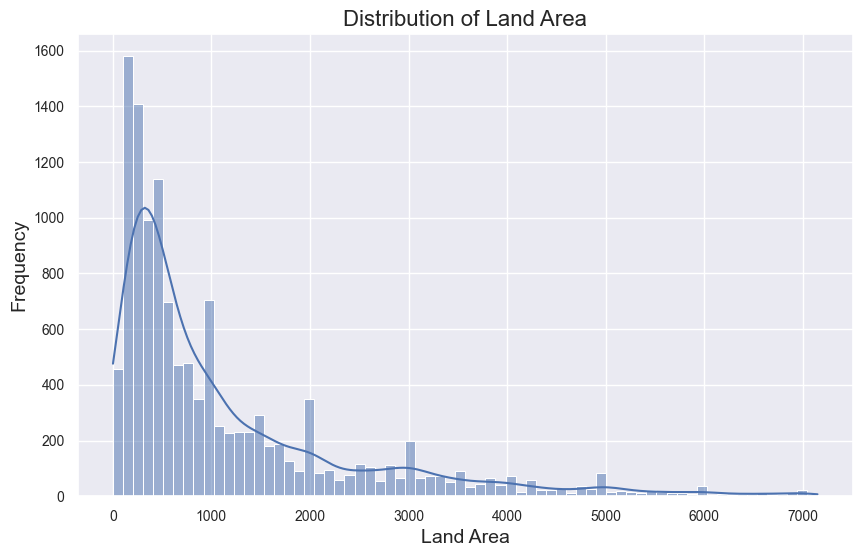

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Land Area'], kde=True)
plt.title('Distribution of Land Area')
plt.xlabel('Land Area')
plt.ylabel('Frequency')
plt.show()

### Total Price Distribution

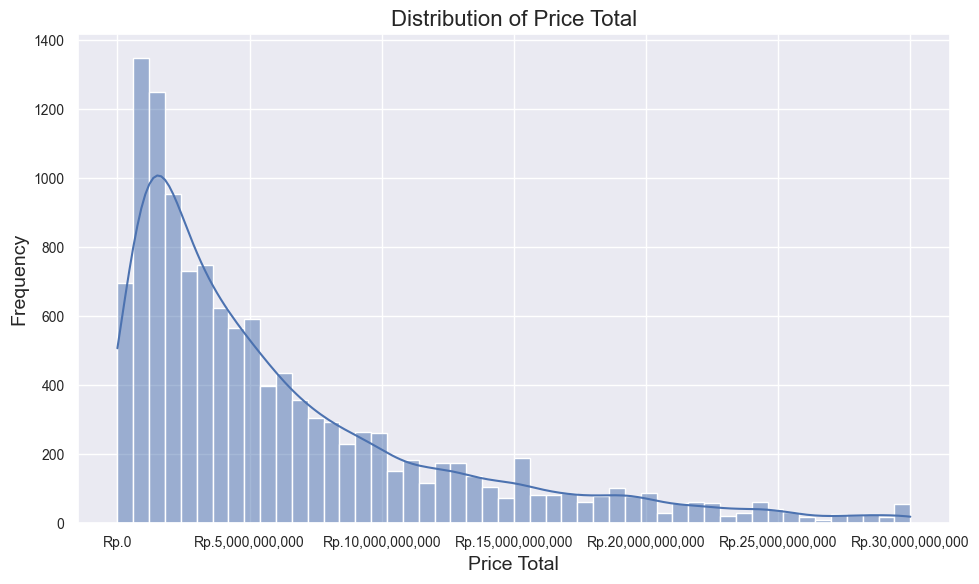

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price Total'], kde=True)
plt.title('Distribution of Price Total')
plt.xlabel('Price Total')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Price per m2 Distribution

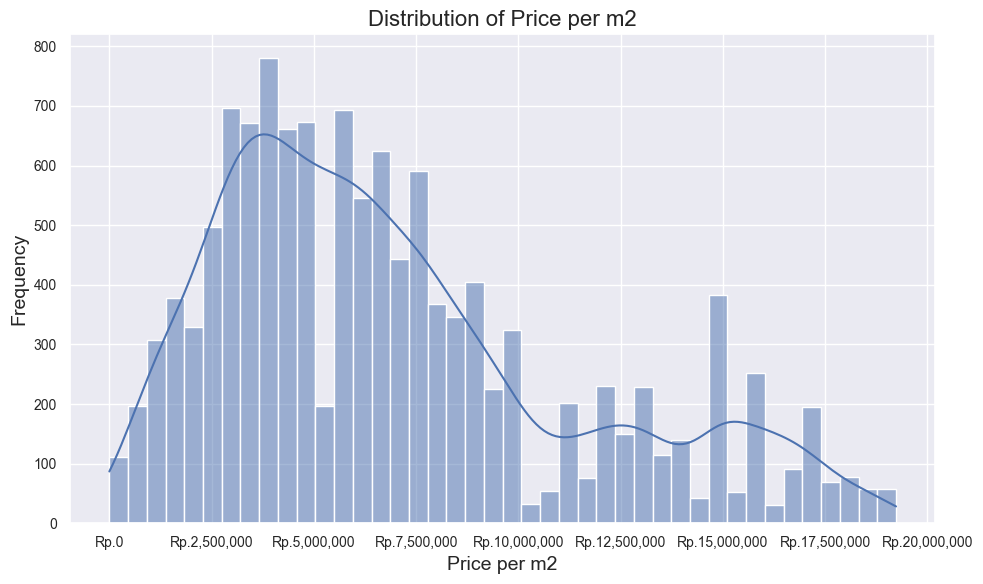

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price per m2'], kde=True)
plt.title('Distribution of Price per m2')
plt.xlabel('Price per m2')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Subdistrict Regency

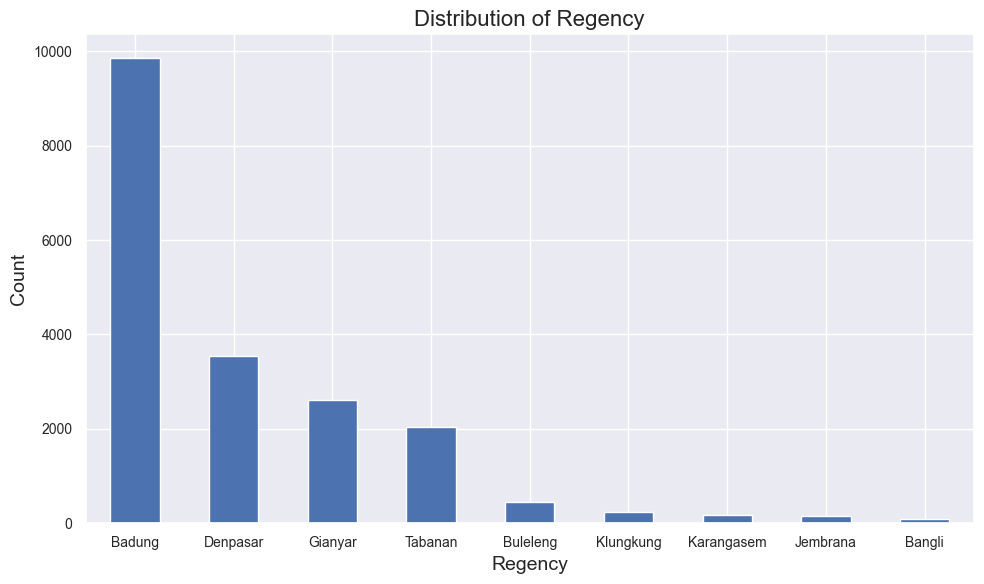

In [33]:
plt.figure(figsize=(10, 6))
df['regency'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Regency')
plt.xlabel('Regency')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [80]:
df['Regency'].value_counts().to_frame().T

Regency,Badung,Denpasar,Gianyar,Tabanan,Buleleng,Klungkung,Jembrana,Karangasem,Bangli
count,6537,2385,1712,1354,216,152,114,80,49


### Land Area Category Distribution

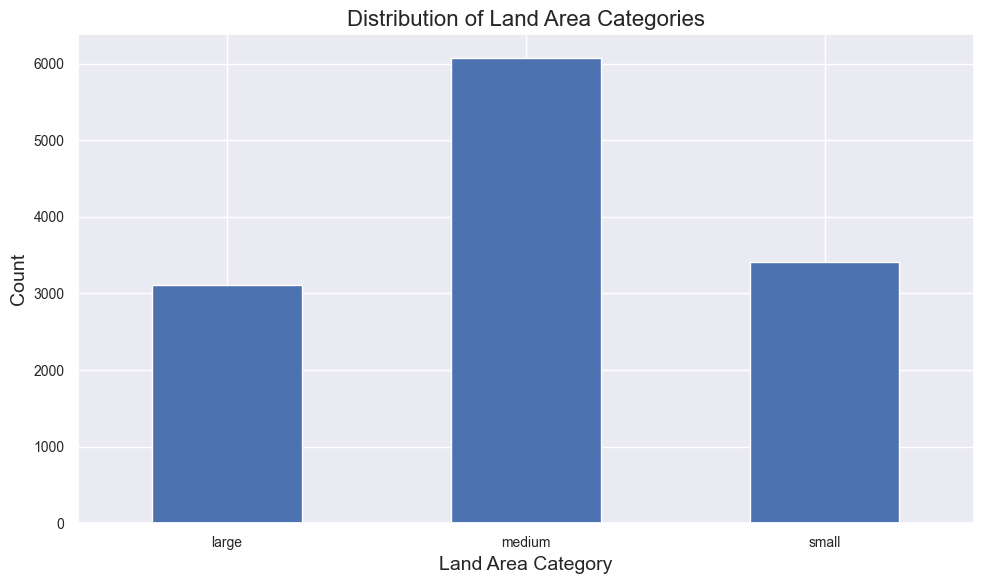

In [66]:
plt.figure(figsize=(10, 6))
df['Land Area Category'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Land Area Categories')
plt.xlabel('Land Area Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [70]:
df['Land Area Category'].value_counts().to_frame().T

Land Area Category,medium,small,large
count,6078,3415,3106


### Showing Price Total Over Time

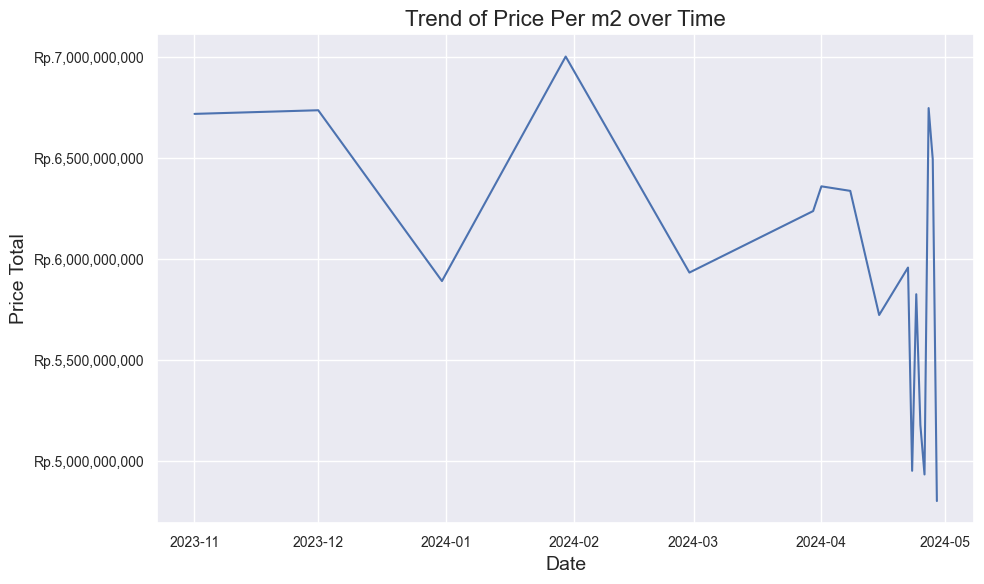

In [54]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Price Total', data=df, errorbar=None)
plt.title('Trend of Price Per m2 over Time')
plt.xlabel('Date')
plt.ylabel('Price Total')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Showing Price per m2 Over Time

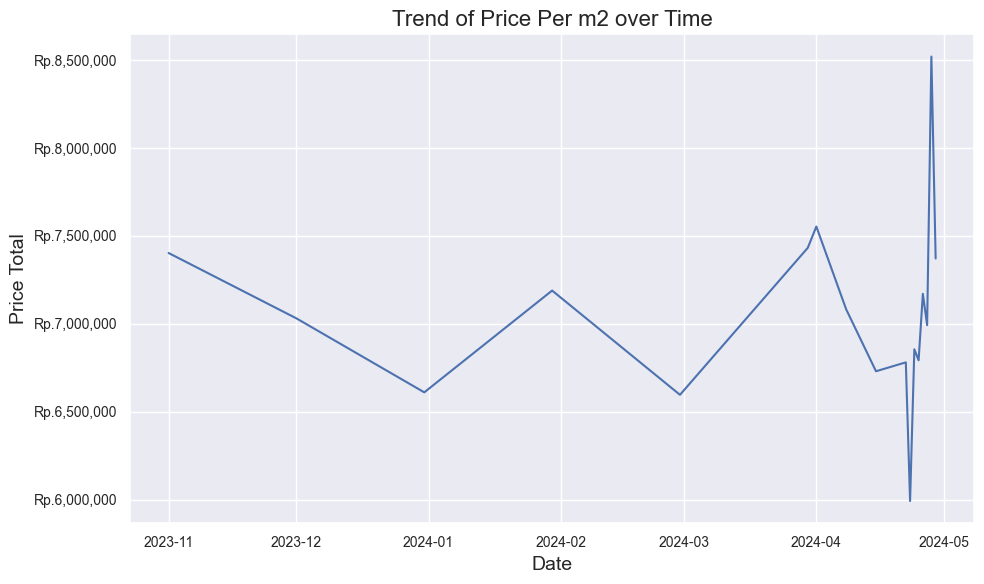

In [88]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Price per m2', data=df, errorbar=None)
plt.title('Trend of Price Per m2 over Time')
plt.xlabel('Date')
plt.ylabel('Price Total')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Showing Relationship between Price Total and Regency  

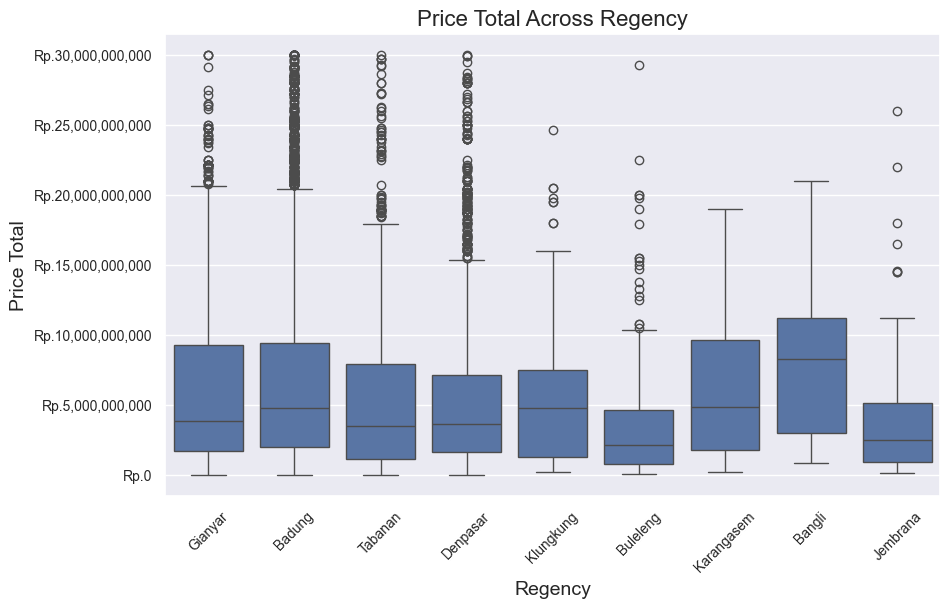

In [90]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Regency', y='Price Total', data=df)
plt.title('Price Total Across Regency')
plt.xlabel('Regency')
plt.ylabel('Price Total')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [123]:
price_sum_by_regency = df.groupby('Regency')['Price Total'].sum()
price_sum_by_regency = price_sum_by_regency.sort_values(ascending=False)
price_sum_by_regency

Regency
Badung        4.516196e+13
Denpasar      1.304470e+13
Gianyar       1.072557e+13
Tabanan       7.351595e+12
Buleleng      8.516358e+11
Klungkung     8.301235e+11
Karangasem    4.756130e+11
Jembrana      4.547188e+11
Bangli        3.818432e+11
Name: Price Total, dtype: float64

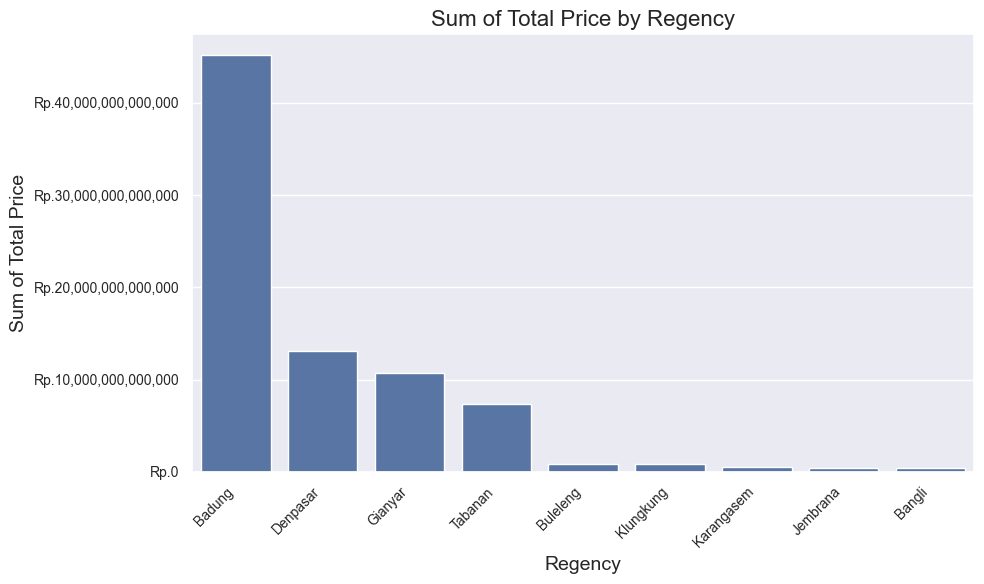

In [125]:
plt.figure(figsize=(10, 6))
sns.barplot(x=price_sum_by_regency.index, y=price_sum_by_regency.values)
plt.title('Sum of Total Price by Regency')
plt.xlabel('Regency')
plt.ylabel('Sum of Total Price')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [126]:
price_mean_by_regency = df.groupby('Regency')['Price Total'].mean()
price_mean_by_regency = price_mean_by_regency.sort_values(ascending=False)
price_mean_by_regency

Regency
Bangli        7.792719e+09
Badung        6.908667e+09
Gianyar       6.264933e+09
Karangasem    5.945162e+09
Denpasar      5.469477e+09
Klungkung     5.461339e+09
Tabanan       5.429538e+09
Jembrana      3.988761e+09
Buleleng      3.942758e+09
Name: Price Total, dtype: float64

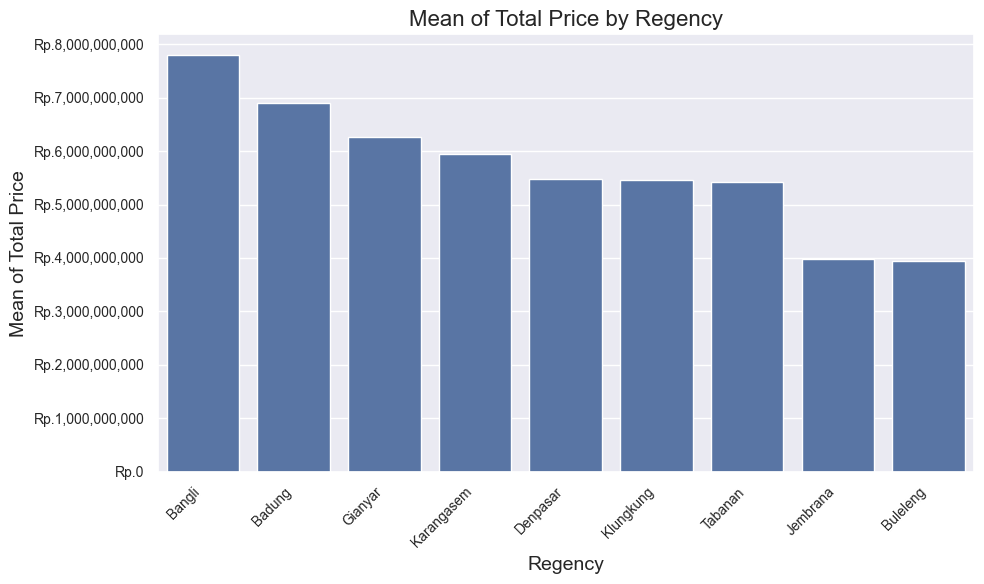

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(x=price_mean_by_regency.index, y=price_mean_by_regency.values)
plt.title('Mean of Total Price by Regency')
plt.xlabel('Regency')
plt.ylabel('Mean of Total Price')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Showing Relationship between Price per m2 and Regency  

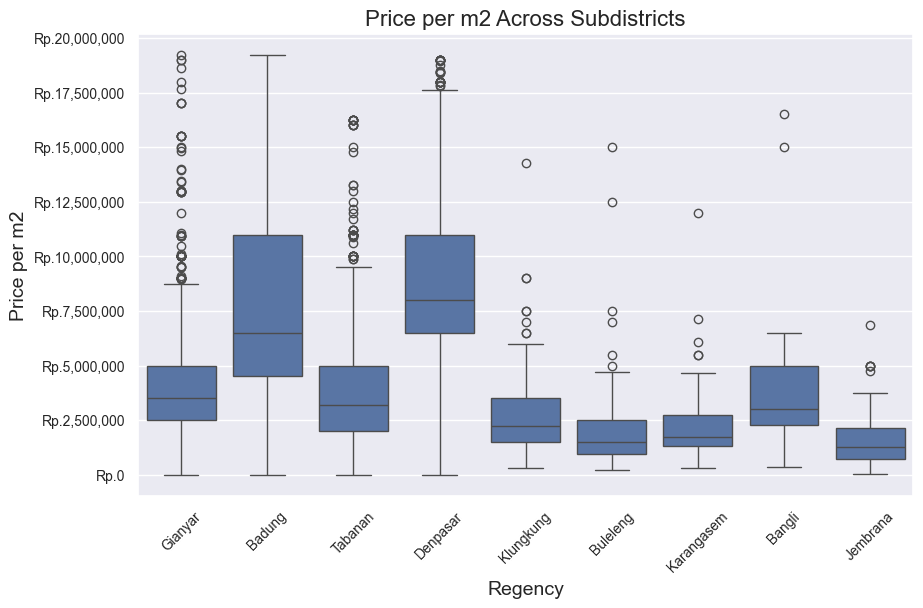

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Regency', y='Price per m2', data=df)
plt.title('Price per m2 Across Subdistricts')
plt.xlabel('Regency')
plt.ylabel('Price per m2')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

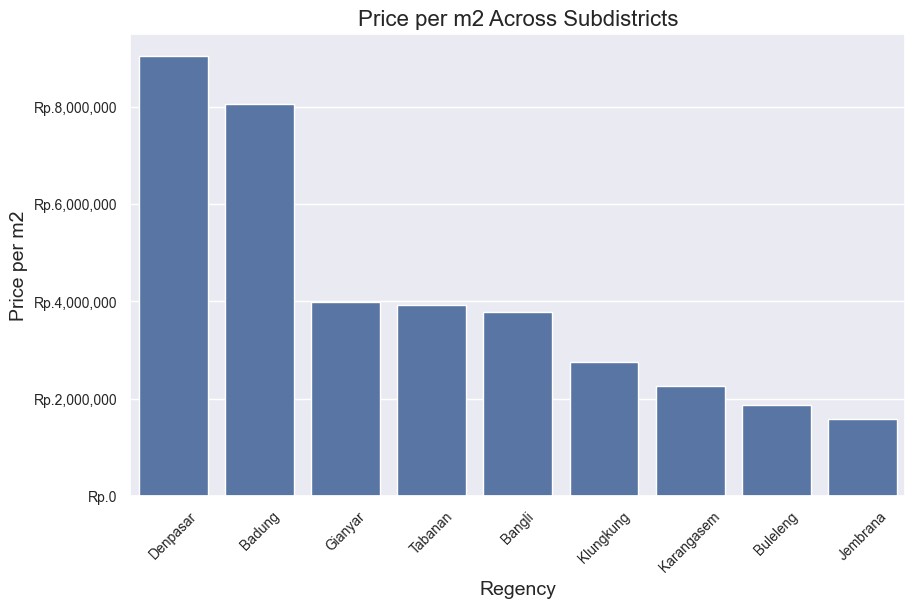

In [129]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Regency', y='Price per m2', data=df, order=df.groupby('Regency')['Price per m2'].mean().sort_values(ascending=False).index, errorbar=None)
plt.title('Price per m2 Across Subdistricts')
plt.xlabel('Regency')
plt.ylabel('Price per m2')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [131]:
pricem2_sum_by_regency = df.groupby('Regency')['Price per m2'].sum()
pricem2_sum_by_regency = pricem2_sum_by_regency.sort_values(ascending=False)
pricem2_sum_by_regency

Regency
Badung        5.273917e+10
Denpasar      2.159819e+10
Gianyar       6.842472e+09
Tabanan       5.305122e+09
Klungkung     4.191557e+08
Buleleng      4.050457e+08
Bangli        1.854103e+08
Karangasem    1.813918e+08
Jembrana      1.809176e+08
Name: Price per m2, dtype: float64

In [132]:
pricem2_mean_by_regency = df.groupby('Regency')['Price per m2'].mean()
pricem2_mean_by_regency = pricem2_mean_by_regency.sort_values(ascending=False)
pricem2_mean_by_regency

Regency
Denpasar      9.055843e+06
Badung        8.067794e+06
Gianyar       3.996771e+06
Tabanan       3.918110e+06
Bangli        3.783884e+06
Klungkung     2.757604e+06
Karangasem    2.267397e+06
Buleleng      1.875212e+06
Jembrana      1.586996e+06
Name: Price per m2, dtype: float64

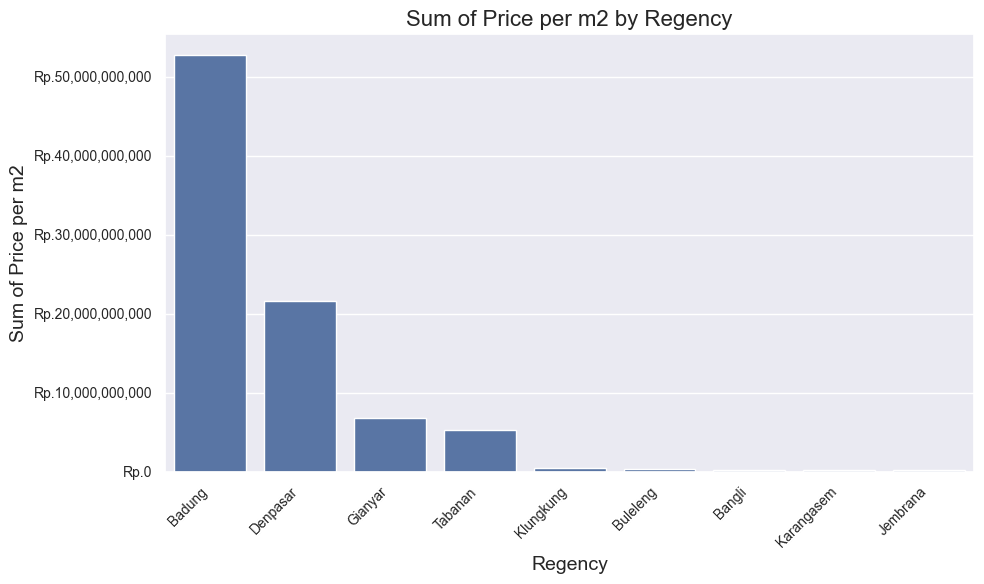

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pricem2_sum_by_regency.index, y=pricem2_sum_by_regency.values)
plt.title('Sum of Price per m2 by Regency')
plt.xlabel('Regency')
plt.ylabel('Sum of Price per m2')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

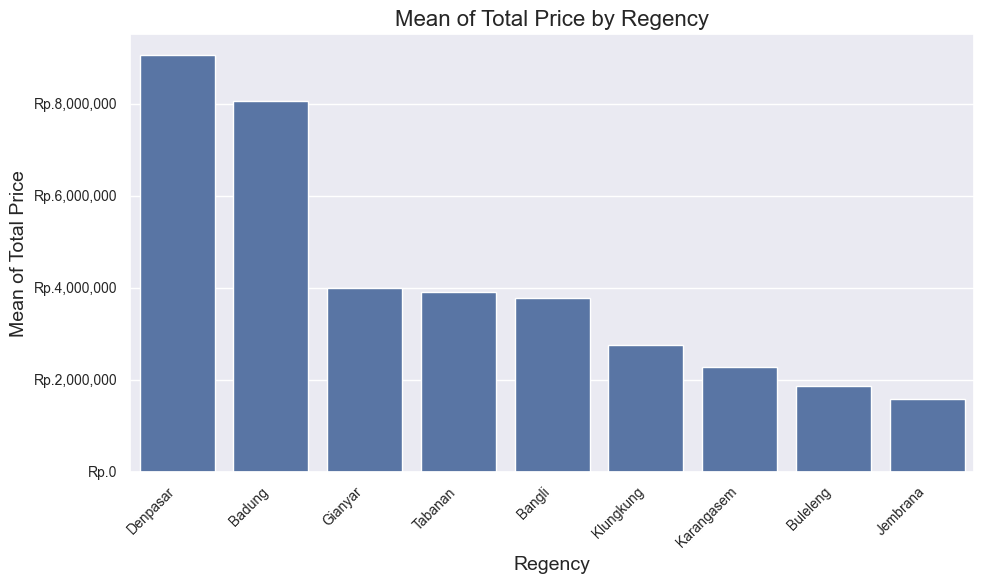

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pricem2_mean_by_regency.index, y=pricem2_mean_by_regency.values)
plt.title('Mean of Total Price by Regency')
plt.xlabel('Regency')
plt.ylabel('Mean of Total Price')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Showing Relationship between Land Area and Price Total

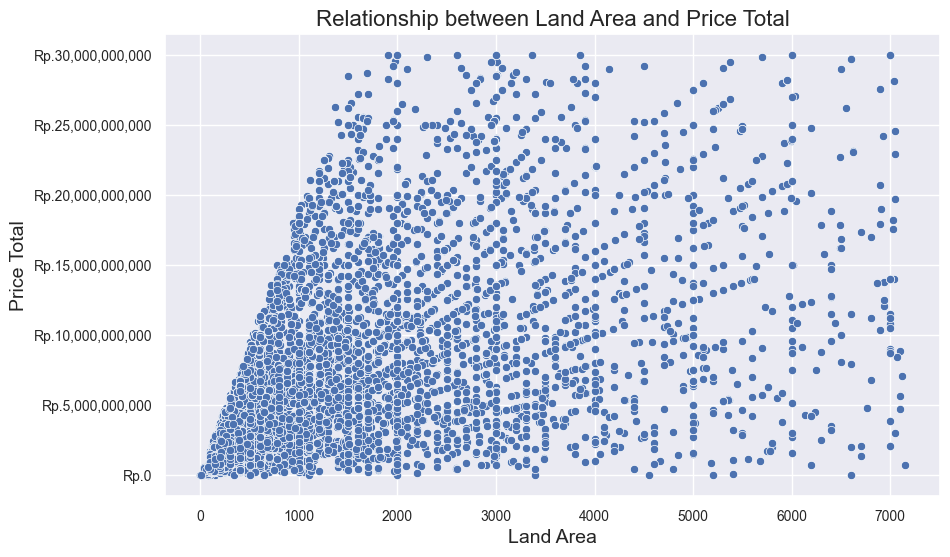

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Land Area', y='Price Total', data=df)
plt.title('Relationship between Land Area and Price Total')
plt.xlabel('Land Area')
plt.ylabel('Price Total')
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### Correlation Analysis

- Sort Price Total Value by Regency

In [12]:
price_sum_by_regency = df.groupby('regency')['price_total'].sum()
price_sum_by_regency.sort_values(ascending=False)

regency
Badung        7.586292e+13
Denpasar      2.292120e+13
Gianyar       1.792960e+13
Tabanan       1.143858e+13
Buleleng      1.758838e+12
Klungkung     1.402708e+12
Karangasem    1.021098e+12
Jembrana      6.491848e+11
Bangli        6.214020e+11
Name: price_total, dtype: float64

- Label Encoding on Regency Column

In [13]:
sorted_regencies = price_sum_by_regency.sort_values(ascending=True).index
encoding_dict = {regency: rank for rank, regency in enumerate(sorted_regencies, start=1)}

In [14]:
df['regency_encoded'] = df['regency'].map(encoding_dict)
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,land_area_cat,regency_encoded
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar,small,7
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,small,9
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung,medium,9
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung,small,9
4,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung,large,9


- Sort Subdistrict Column by Sum of Price Total

In [15]:
price_sum_by_subd = df.groupby('subdistrict')['price_total'].sum()
price_sum_by_subd.sort_values(ascending=False)

subdistrict
Canggu               1.230964e+13
Ungasan              7.964573e+12
Jimbaran             7.743961e+12
Ubud                 7.213445e+12
Renon                5.240868e+12
                         ...     
Alasangker           1.850000e+08
Penglatan            1.640000e+08
Tegalbadeng Timur    1.600000e+08
Dalang               1.600000e+08
Busungbiu            1.250000e+08
Name: price_total, Length: 395, dtype: float64

- Label Encoding on Subdistrict Column

In [16]:
sorted_subd = price_sum_by_subd.sort_values(ascending=True).index
encoding_subd = {regency: rank for rank, regency in enumerate(sorted_subd, start=1)}

In [17]:
df['subdistrict_encoded'] = df['subdistrict'].map(encoding_subd)
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,land_area_cat,regency_encoded,subdistrict_encoded
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar,small,7,392
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,small,9,390
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung,medium,9,394
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung,small,9,384
4,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung,large,9,394


- Sort Land Area Category by Sum of Price Total

In [18]:
price_sum_by_landcat = df.groupby('land_area_cat')['price_total'].sum()
price_sum_by_landcat.sort_values(ascending=False)

land_area_cat
medium    6.349204e+13
large     6.224160e+13
small     7.871875e+12
Name: price_total, dtype: float64

- Label Encoding on Land Area Category Column

In [19]:
sorted_land_area = price_sum_by_landcat.sort_values(ascending=True).index
encoding_land_area = {landcat: rank for rank, landcat in enumerate(sorted_land_area, start=1)}

In [20]:
df['land_area_cat_encoded'] = df['land_area_cat'].map(encoding_land_area)
df.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,land_area_cat,regency_encoded,subdistrict_encoded,land_area_cat_encoded
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar,small,7,392,1
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,small,9,390,1
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung,medium,9,394,3
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung,small,9,384,1
4,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung,large,9,394,2


- Backup Dataframe

In [21]:
df_encoded = df.copy()
df_encoded.head()

,date,land_area,price_total,price_per_m2,subdistrict,regency,land_area_cat,regency_encoded,subdistrict_encoded,land_area_cat_encoded
0,2024-05-19,200.0,7.000000e+08,3500000.0,Ubud,Gianyar,small,7,392,1
1,2024-05-19,200.0,8.000000e+08,4000000.0,Nusa Dua,Badung,small,9,390,1
2,2024-05-19,376.0,3.572000e+09,9500000.0,Ungasan,Badung,medium,9,394,3
3,2024-05-19,100.0,1.500000e+09,15000000.0,Seminyak,Badung,small,9,384,1
4,2024-05-19,3340.0,1.169000e+10,3500000.0,Ungasan,Badung,large,9,394,2


- Delete the Categorical Column

In [22]:
df = df_encoded.copy()

df = df.drop(columns=['regency', 'subdistrict', 'land_area_cat'])
df.head()

,date,land_area,price_total,price_per_m2,regency_encoded,subdistrict_encoded,land_area_cat_encoded
0,2024-05-19,200.0,7.000000e+08,3500000.0,7,392,1
1,2024-05-19,200.0,8.000000e+08,4000000.0,9,390,1
2,2024-05-19,376.0,3.572000e+09,9500000.0,9,394,3
3,2024-05-19,100.0,1.500000e+09,15000000.0,9,384,1
4,2024-05-19,3340.0,1.169000e+10,3500000.0,9,394,2


- Correlation Matrix of Dataframe

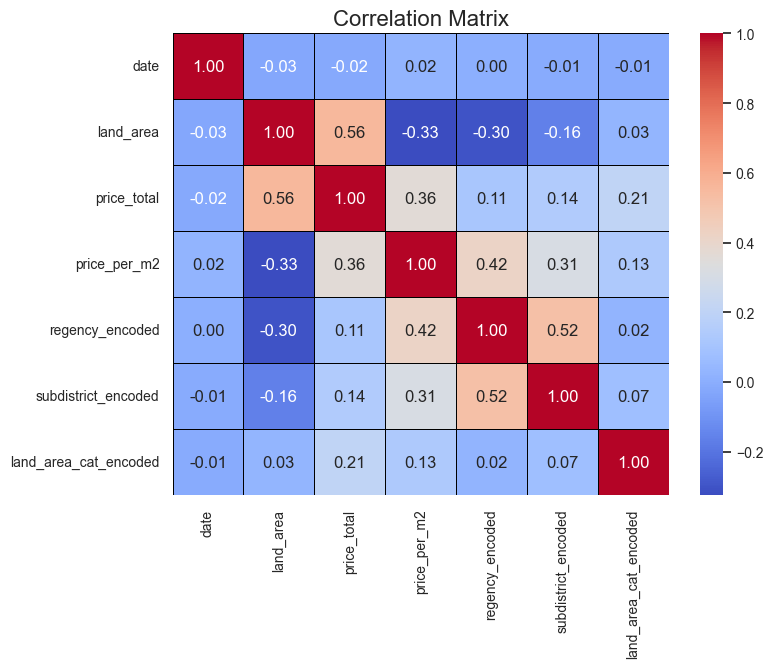

In [23]:
correlation_mat = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Correlation Matrix")
plt.show()

In [24]:
target_corr = correlation_mat['price_per_m2'].drop('price_per_m2')
print("Correlation with 'Price per m2':")
print(target_corr)

Correlation with 'Price per m2':
date                     0.023235
land_area               -0.325263
price_total              0.360445
regency_encoded          0.416364
subdistrict_encoded      0.306645
land_area_cat_encoded    0.134792
Name: price_per_m2, dtype: float64


In [25]:
correlation_threshold = 0.29
selected_features = target_corr[target_corr.abs() > correlation_threshold].index.tolist()

print("Selected features based on correlation:")
print(selected_features)

Selected features based on correlation:
['land_area', 'price_total', 'regency_encoded', 'subdistrict_encoded']
